In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data7_more_years.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data8_more_years.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data9_more_years.csv')
data4 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data10_more_years.csv')
data5 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data11_more_years.csv')
data6 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data12_more_years.csv')

In [ ]:
print(len(data1))
print(len(data2))
print(len(data3))
print(len(data4))
print(len(data5))
print(len(data6))

8770
8770
8770
8770
8770
8770


In [ ]:
data6

,Open,Close,High,Low,Typical Price,Volume,VWAP,adl,cmf,stochastic_d,...,day,month,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7
0,0.638206,0.627048,0.642669,0.624817,0.631512,36272000,0.592209,2.095763e+08,1.722167,59.347526,...,6,7,0.644157,0.006677,0.647132,0.004160,0.636719,0.002386,0.590704,0.001953
1,0.624817,0.624817,0.633743,0.620355,0.626305,44294400,0.592842,1.948103e+08,2.032240,48.423425,...,7,7,0.642669,0.004245,0.645645,0.002008,0.633743,0.004463,0.591529,0.002001
2,0.624817,0.624817,0.633743,0.624817,0.627793,18553600,0.593112,1.762567e+08,2.345364,37.405848,...,8,7,0.635231,0.007481,0.641181,0.005312,0.627793,0.006747,0.592214,0.001898
3,0.624817,0.618122,0.635974,0.615891,0.623329,48729600,0.593712,1.383553e+08,2.553082,27.793625,...,11,7,0.629280,0.009084,0.636718,0.006312,0.623330,0.007157,0.592721,0.001665
4,0.638207,0.638207,0.642669,0.629281,0.636719,123193600,0.595767,1.794232e+08,2.616284,26.396776,...,12,7,0.624817,0.009884,0.634487,0.006405,0.620354,0.008819,0.593222,0.001395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765,31.100000,31.150000,31.520000,31.080000,31.250000,25746600,13.949643,7.846030e+09,189.052024,52.066792,...,19,4,32.126667,0.386843,32.446667,0.298312,31.746668,0.260512,13.947708,0.002375
8766,30.760000,30.860001,31.250000,30.709999,30.940000,30255100,13.950702,7.832584e+09,190.668394,35.710711,...,20,4,31.826668,0.574771,32.206665,0.511859,31.543333,0.372559,13.948708,0.002281
8767,30.840000,30.299999,30.840000,30.230000,30.456666,28638900,13.951675,7.810518e+09,194.134481,19.399964,...,21,4,31.430000,0.702939,31.743334,0.599523,31.190000,0.450777,13.949690,0.002172
8768,30.129999,29.660000,30.370001,29.610001,29.880000,38732500,13.952946,7.776882e+09,198.196135,11.018889,...,24,4,30.900000,0.650659,31.203333,0.700867,30.673332,0.614023,13.950673,0.002148


In [ ]:
window_size = 70   # no.of (days) samples of historic data given as one sample for LSTMs 
period = 252       # no.of days to be considered for selling and return

In [ ]:
data1['return'] =  (data1['Close'] - data1['Open'])/data1['Open']
data2['return'] =  (data2['Close'] - data2['Open'])/data1['Open']
data3['return'] =  (data3['Close'] - data3['Open'])/data1['Open']
data4['return'] =  (data4['Close'] - data4['Open'])/data1['Open']
data5['return'] =  (data5['Close'] - data5['Open'])/data1['Open']
data6['return'] =  (data6['Close'] - data6['Open'])/data1['Open']

In [ ]:
data5

,Open,Close,High,Low,Typical Price,Volume,VWAP,adl,cmf,stochastic_d,...,month,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,return
0,2.160465,2.160465,2.173968,2.146962,2.160465,1867188,2.137017,1.269837e+07,4.396227,29.892825,...,7,2.155964,0.052130,2.182970,0.043927,2.128959,0.046449,2.136406,0.001108,0.000000
1,2.140210,2.194221,2.200972,2.126706,2.173967,3731350,2.138195,1.575133e+07,4.532941,31.613452,...,7,2.158215,0.037271,2.178469,0.026682,2.131209,0.025687,2.136707,0.000953,0.020878
2,2.194220,2.180717,2.207723,2.167214,2.185218,3847356,2.139691,1.446883e+07,4.540703,34.396622,...,7,2.137960,0.030622,2.178469,0.016406,2.128958,0.015025,2.137279,0.001013,-0.005238
3,2.187469,2.173966,2.187469,2.146960,2.169465,1664430,2.140095,1.502365e+07,4.708170,37.070117,...,7,2.164965,0.030621,2.194221,0.017617,2.146961,0.016926,2.138301,0.001422,-0.005219
4,2.173967,2.126706,2.173967,2.106452,2.135708,1918634,2.140027,1.425620e+07,4.718344,32.566349,...,7,2.173966,0.031872,2.198722,0.016733,2.146960,0.017181,2.139327,0.001610,-0.018142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765,216.929993,217.039993,218.119995,216.669998,217.276662,863000,46.635982,1.140326e+09,703.295852,50.753798,...,4,217.043330,1.504876,218.566670,1.633508,215.379990,1.310455,46.618030,0.026113,0.000594
8766,215.740005,215.619995,216.570007,214.360001,215.516668,1117800,46.645734,1.140482e+09,716.863545,48.695644,...,4,217.280000,1.313325,218.606660,1.220960,216.340000,1.328242,46.628162,0.024466,-0.000649
8767,215.979996,215.210007,215.979996,213.809998,215.000000,1093000,46.655240,1.140800e+09,735.613311,46.887956,...,4,217.116670,1.045062,218.053330,0.909027,215.883330,1.137512,46.636696,0.022592,-0.004140
8768,215.880005,215.470001,216.789993,214.789993,215.683329,1332200,46.666872,1.140373e+09,745.101354,46.144776,...,4,216.216660,1.027152,216.890000,1.148721,214.946670,1.256727,46.645653,0.021476,-0.002198


In [ ]:
y1 = data1['return']
y2 = data2['return']
y3 = data3['return']
y4 = data4['return']
y5 = data5['return']
y6 = data6['return']

In [ ]:
data1.head()

,Open,Close,High,Low,Typical Price,Volume,VWAP,adl,cmf,stochastic_d,...,month,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,return
0,2.668166,2.578025,2.668166,2.559997,2.602062,3496200,2.575902,3.070060e+07,8.375036,54.266173,...,7,2.668165,0.021904,2.689198,0.014455,2.644128,0.012125,2.574306,0.003209,-0.033784
1,2.587039,2.596053,2.614081,2.550982,2.587039,2701800,2.576082,3.185851e+07,8.957496,45.488212,...,7,2.668166,0.020817,2.680184,0.017148,2.611077,0.032441,2.575223,0.002922,0.003484
2,2.578025,2.587039,2.605067,2.569011,2.587039,2035200,2.576214,3.185853e+07,9.255355,33.038331,...,7,2.632109,0.035242,2.650137,0.033613,2.584034,0.043808,2.575773,0.002407,0.003497
3,2.587039,2.596053,2.614081,2.569010,2.593048,1646400,2.576376,3.218781e+07,9.630924,29.482275,...,7,2.611077,0.045625,2.629105,0.042735,2.559997,0.046797,2.576066,0.001750,0.003484
4,2.605067,2.578025,2.605067,2.559997,2.581029,3092400,2.576459,3.156931e+07,9.652157,25.852406,...,7,2.584034,0.047698,2.611076,0.041214,2.563001,0.044898,2.576224,0.001177,-0.010381


In [ ]:
y = pd.concat([y1,y2,y3,y4,y5,y6],axis = 1)
y

,return,return,return,return,return,return
0,-0.033784,-0.001639,-0.013425,-0.001624,0.000000,-0.004182
1,0.003484,-0.001691,0.005192,0.000838,0.020878,0.000000
2,0.003497,-0.000679,-0.001737,0.000840,-0.005238,0.000000
3,0.003484,-0.001015,-0.019038,-0.003350,-0.005219,-0.002588
4,-0.010381,-0.000672,-0.015469,-0.002287,-0.018142,0.000000
...,...,...,...,...,...,...
8765,-0.002807,0.009879,-0.011067,0.013280,0.000594,0.000270
8766,0.002651,0.003030,0.011902,0.004653,-0.000649,0.000541
8767,-0.003118,-0.000161,0.007635,0.004032,-0.004140,-0.002903
8768,-0.005362,0.001769,-0.006649,-0.001716,-0.002198,-0.002520


In [ ]:
data = pd.concat([data1,data2,data3,data4,data5,data6],axis = 1)
data

,Open,Close,High,Low,Typical Price,Volume,VWAP,adl,cmf,stochastic_d,...,month,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,return
0,2.668166,2.578025,2.668166,2.559997,2.602062,3496200,2.575902,3.070060e+07,8.375036,54.266173,...,7,0.644157,0.006677,0.647132,0.004160,0.636719,0.002386,0.590704,0.001953,-0.004182
1,2.587039,2.596053,2.614081,2.550982,2.587039,2701800,2.576082,3.185851e+07,8.957496,45.488212,...,7,0.642669,0.004245,0.645645,0.002008,0.633743,0.004463,0.591529,0.002001,0.000000
2,2.578025,2.587039,2.605067,2.569011,2.587039,2035200,2.576214,3.185853e+07,9.255355,33.038331,...,7,0.635231,0.007481,0.641181,0.005312,0.627793,0.006747,0.592214,0.001898,0.000000
3,2.587039,2.596053,2.614081,2.569010,2.593048,1646400,2.576376,3.218781e+07,9.630924,29.482275,...,7,0.629280,0.009084,0.636718,0.006312,0.623330,0.007157,0.592721,0.001665,-0.002588
4,2.605067,2.578025,2.605067,2.559997,2.581029,3092400,2.576459,3.156931e+07,9.652157,25.852406,...,7,0.624817,0.009884,0.634487,0.006405,0.620354,0.008819,0.593222,0.001395,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765,185.240005,184.720001,185.320007,184.259995,184.766668,2209900,50.845928,2.028128e+09,576.672270,87.854964,...,4,32.126667,0.386843,32.446667,0.298312,31.746668,0.260512,13.947708,0.002375,0.000270
8766,184.839996,185.330002,186.039993,184.199997,185.189997,3868200,50.858551,2.029011e+09,581.016210,88.678155,...,4,31.826668,0.574771,32.206665,0.511859,31.543333,0.372559,13.948708,0.002281,0.000541
8767,185.990005,185.410004,186.380005,185.130005,185.640004,3781800,50.870931,2.026924e+09,588.496546,87.629125,...,4,31.430000,0.702939,31.743334,0.599523,31.190000,0.450777,13.949690,0.002172,-0.002903
8768,186.500000,185.500000,186.570007,185.020004,185.696671,3540200,50.882523,2.025576e+09,590.022084,85.752796,...,4,30.900000,0.650659,31.203333,0.700867,30.673332,0.614023,13.950673,0.002148,-0.002520


In [ ]:
data = data.values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(data)
data = sc.transform(data)

In [ ]:
data.shape

(8770, 198)

In [ ]:
y = y.values

In [ ]:
y.shape

(8770, 6)

In [ ]:
X = []
for i in range(len(data)-window_size):
  X.append(data[i:i+window_size,:])

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(8700, 70, 198)

In [ ]:
y_ = y[window_size:,:]
y_.shape

(8700, 6)

In [ ]:
Y = []
for i in range(len(y_)-period):
  Y.append(y_[i:i+period,:])

In [ ]:
Y = np.array(Y)
Y.shape

(8448, 252, 6)

In [ ]:
X = X[:-period,:]
X.shape

(8448, 70, 198)

In [ ]:
X_train = X[:-252*3,:,:]
X_test = X[-252*3:,:,:]
y_train = Y[:-252*3,:,:]
y_test = Y[-252*3:,:,:]

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,Y,shuffle = False,random_state = 34,test_size = 0.3)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(7692, 70, 198)
(7692, 252, 6)


In [ ]:
input_size = int(X_train.shape[2]/6)
input_size

33

In [ ]:
input1 = X_train[:,:,:input_size]
input2 = X_train[:,:,input_size:2*input_size]
input3 = X_train[:,:,2*input_size:3*input_size]
input4 = X_train[:,:,3*input_size:4*input_size]
input5 = X_train[:,:,4*input_size:5*input_size]
input6 = X_train[:,:,5*input_size:6*input_size]
output = y_train

In [ ]:
input1.shape

(7692, 70, 33)

In [ ]:
test_input1 = X_test[:,:,:input_size]
test_input2 = X_test[:,:,1*input_size:2*input_size]
test_input3 = X_test[:,:,2*input_size:3*input_size]
test_input4 = X_test[:,:,3*input_size:4*input_size]
test_input5 = X_test[:,:,4*input_size:5*input_size]
test_input6 = X_test[:,:,5*input_size:6*input_size]

In [ ]:
test_input1.shape

(756, 70, 33)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Input,BatchNormalization,Dropout, LSTM
from keras.models import Sequential

In [ ]:
input_size = input1.shape[1:]

In [ ]:
input_size

(70, 33)

In [ ]:
def single_model(input):
  x = LSTM(units =128,return_sequences=True,activation = 'tanh')(input)
  x = LSTM(units =128,return_sequences=True,activation = 'tanh')(x)
  x = Dropout(0.2)(x)
  x = BatchNormalization()(x)
  
  x = LSTM(units=64,return_sequences=True,activation = 'tanh')(x)
  x = LSTM(units=64,return_sequences=True,activation = 'tanh')(x)
  #x = Dropout(0.2)(x)
  x = BatchNormalization()(x)

  x = LSTM(units=32,return_sequences=True,activation = 'tanh')(x)
  x = LSTM(units=32,return_sequences=True,activation = 'tanh')(x)
  #x = Dropout(0.2)(x)
  x = BatchNormalization()(x)

  x = LSTM(units=4,activation = 'tanh',return_sequences = True)(x)
  x = LSTM(units=4,activation = 'tanh')(x)
  #x = Dropout(0.2)(x)
  x = BatchNormalization()(x)

  x = Dense(units=1,activation = 'linear')(x)
  return x

In [ ]:
def create_model():
  input1 = keras.Input(shape = input_size)
  input2 = keras.Input(shape = input_size)
  input3 = keras.Input(shape = input_size)
  input4 = keras.Input(shape = input_size)
  input5 = keras.Input(shape = input_size)
  input6 = keras.Input(shape = input_size)
  x1 = single_model(input1)
  x2 = single_model(input2)
  x3 = single_model(input3)
  x4 = single_model(input4)
  x5 = single_model(input5)
  x6 = single_model(input6)
  y = tf.keras.layers.Concatenate()([x1,x2,x3,x4,x5,x6])
  y = Dense(48,activation = 'linear')(y)
  y = Dropout(0.2)(y)
  y = Dense(24,activation = 'linear')(y)
  y = Dense(12,activation = 'linear')(y)
  y = Dense(6,activation = 'softmax')(y)
  #print(y)
  model = tf.keras.models.Model(inputs = [input1,input2,input3,input4,input5,input6],outputs = [y])
  return model

In [ ]:
model = create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 70, 33)]     0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 70, 33)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 70, 33)]     0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 70, 33)]     0           []                               
                                                                                              

In [ ]:
from keras.utils import plot_model

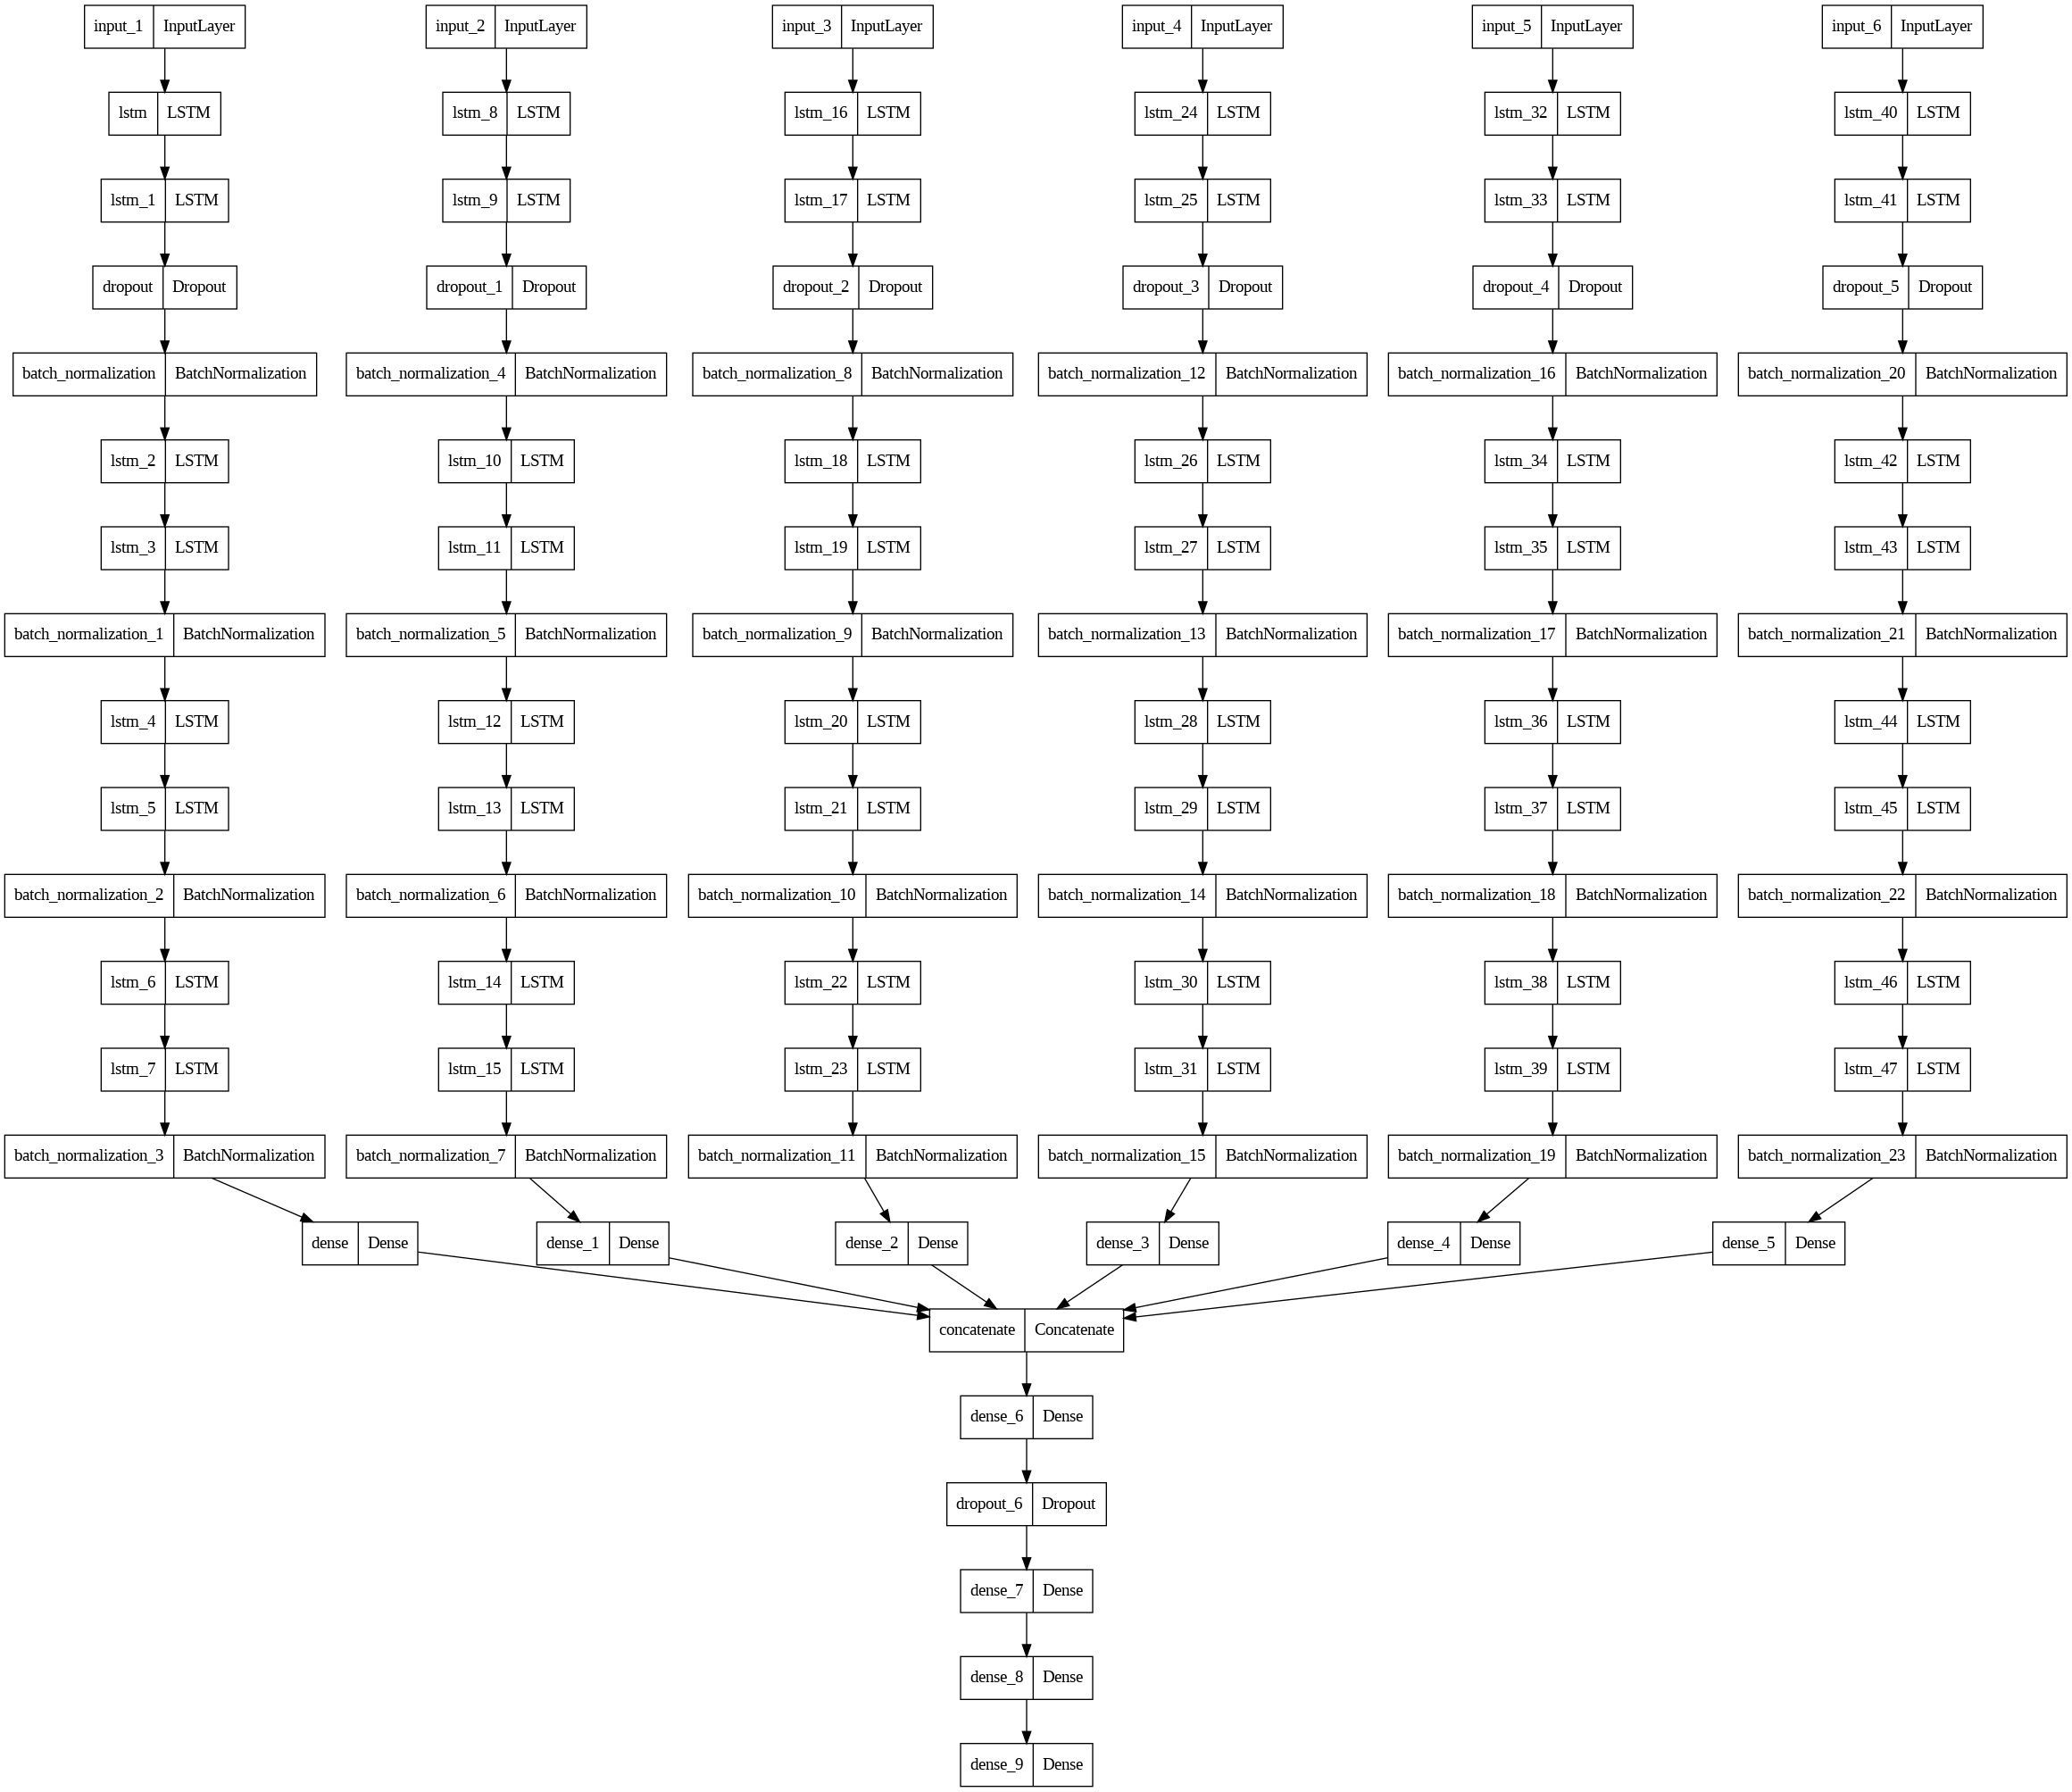

In [ ]:
plot_model(model)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import backend as K

In [ ]:
print(input1.shape)
print(y_train.shape)

(7692, 70, 33)
(7692, 252, 6)


In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
rlr = ReduceLROnPlateau(patience = 20)
mcp = ModelCheckpoint(monitor = 'val_loss',filepath = '/content/drive/MyDrive/Portfolio Optimization/Models/lstm_diverse_more_years_window.h5',save_best_only = True)

In [ ]:
def annual_mean_sharpe_ratio(y_true,y_pred):
  #print(y_pred)
  #print(y_true)
  y_true = tf.cast(y_true,tf.float64)
  y_pred = tf.cast(y_pred,tf.float64)
  y_pred = tf.reshape(y_pred,(-1,1,6))
  r = y_true*y_pred
  returns = K.sum(r,axis = 2)
  mean_return = K.mean(returns,axis = 1)
  std_return = K.std(returns,axis = 1)
  z = K.mean(15.87*mean_return/std_return)
  return K.exp(-z)

In [ ]:
def amsr(y_true,y_pred):
  #print(y_pred)
  y_true = tf.cast(y_true,tf.float64)
  y_pred = tf.cast(y_pred,tf.float64)
  y_pred = tf.reshape(y_pred,(-1,1,6))
  r = y_true*y_pred
  returns = K.sum(r,axis = 2)
  mean_return = K.mean(returns,axis = 1)
  std_return = K.std(returns,axis = 1)
  z = K.mean(15.87*mean_return/std_return)
  return z

In [ ]:
model.compile(optimizer = 'adam',loss = annual_mean_sharpe_ratio, metrics = amsr)

In [ ]:
history = model.fit([input1,input2,input3,input4,input5,input6],
          output,epochs = 100,
          validation_data = ([test_input1,test_input2,test_input3,test_input4,test_input5,test_input6],y_test),
          callbacks = [mcp],batch_size = 32)

Epoch 1/100
241/241 [==============================] - 53s 218ms/step - loss: 0.1236 - amsr: 2.1089 - val_loss: 0.5442 - val_amsr: 0.7037
Epoch 2/100
241/241 [==============================] - 47s 193ms/step - loss: 0.1234 - amsr: 2.1071 - val_loss: 0.5132 - val_amsr: 0.7908
Epoch 3/100
241/241 [==============================] - 45s 185ms/step - loss: 0.1235 - amsr: 2.1089 - val_loss: 0.4967 - val_amsr: 0.7809
Epoch 4/100
241/241 [==============================] - 44s 184ms/step - loss: 0.1230 - amsr: 2.1092 - val_loss: 0.4925 - val_amsr: 0.8344
Epoch 5/100
241/241 [==============================] - 44s 181ms/step - loss: 0.1234 - amsr: 2.1085 - val_loss: 0.5555 - val_amsr: 0.6772
Epoch 6/100
241/241 [==============================] - 44s 183ms/step - loss: 0.1230 - amsr: 2.1103 - val_loss: 0.5430 - val_amsr: 0.7264
Epoch 7/100
241/241 [==============================] - 45s 187ms/step - loss: 0.1231 - amsr: 2.1094 - val_loss: 0.5540 - val_amsr: 0.7119
Epoch 8/100
241/241 [=============

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-5b7afca9ed97>", line 1, in <cell line: 1>
    history = model.fit([input1,input2,input3,input4,input5,input6],
  File "/usr/local/lib/python3.9/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1685, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 894, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/ea

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'amsr', 'val_loss', 'val_amsr'])


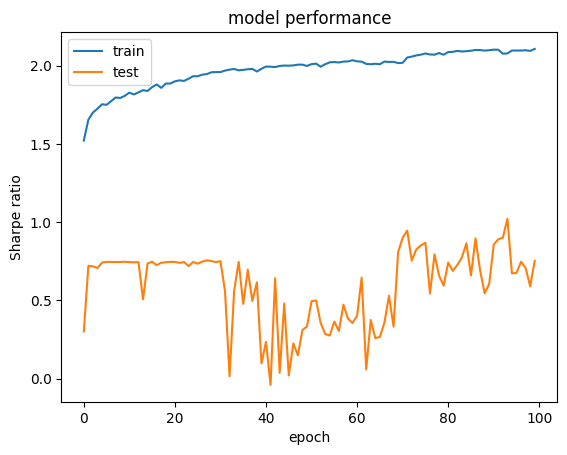

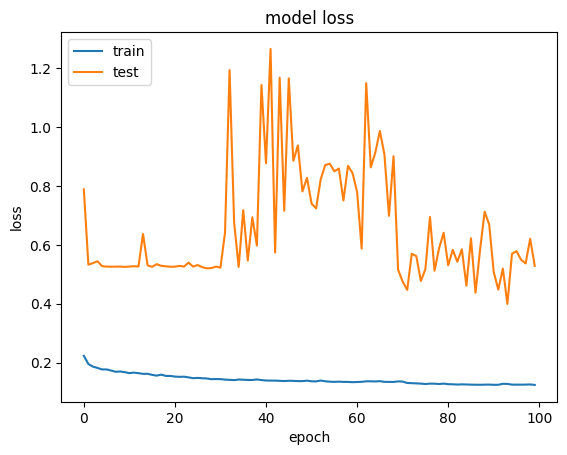

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['amsr'])
plt.plot(history.history['val_amsr'])
plt.title('model performance')
plt.ylabel('Sharpe ratio')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'amsr', 'val_loss', 'val_amsr'])


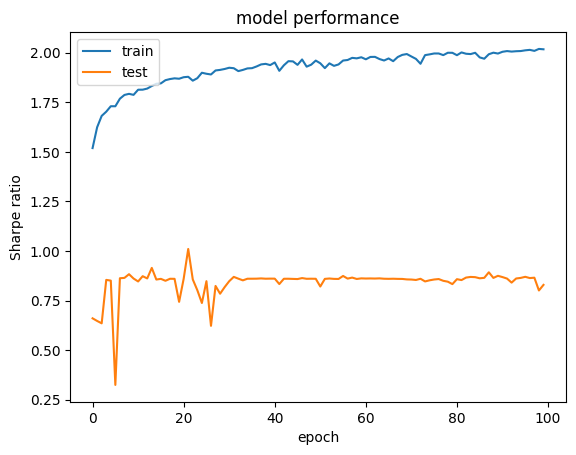

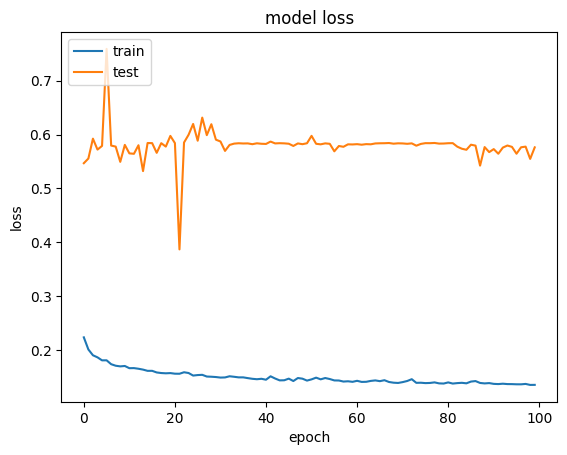

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['amsr'])
plt.plot(history.history['val_amsr'])
plt.title('model performance')
plt.ylabel('Sharpe ratio')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#from keras.models import load_model
model.load_weights(filepath = '/content/drive/MyDrive/Portfolio Optimization/Models/lstm_diverse_more_years_window.h5')
#model.load_weights(filepath = '/content/drive/MyDrive/Portfolio Optimization/Models/lstm_diverse_12y.h5')

In [ ]:
model.evaluate([input1,input2,input3,input4,input5,input6],output)

242/242 [==============================] - 8s 31ms/step - loss: 0.2489 - amsr: 1.8380


[0.24890948832035065, 1.8380252122879028]

In [ ]:
model.evaluate([test_input1,test_input2,test_input3,test_input4,test_input5,test_input6],y_test)

24/24 [==============================] - 1s 46ms/step - loss: 0.3866 - amsr: 1.0104


[0.38661789894104004, 1.010400652885437]

In [ ]:
model.predict([input1,input2,input3,input4,input5,input6])

242/242 [==============================] - 7s 30ms/step


array([[0.12569991, 0.00154767, 0.00236003, 0.6063155 , 0.10453999,
        0.15953696],
       [0.12414628, 0.00154259, 0.00231943, 0.60901755, 0.10346489,
        0.15950923],
       [0.1265496 , 0.00154127, 0.00232411, 0.60317844, 0.10453793,
        0.16186863],
       ...,
       [0.03609677, 0.4925006 , 0.01745695, 0.2564744 , 0.09522288,
        0.10224834],
       [0.0304986 , 0.501156  , 0.0166579 , 0.27190593, 0.08766617,
        0.09211545],
       [0.02375207, 0.50621   , 0.0123343 , 0.2955885 , 0.07514568,
        0.08696945]], dtype=float32)